# **Implentation de CNN basic en se basant sur le dataset MNIST**

**Importattion des librairie necessaire**

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
print(tf.__version__)
import sys ,os
from tensorflow.keras.datasets import mnist
from importlib import reload
(x_train, y_train), (x_test, y_test) = mnist.load_data()


2.18.0


In [ ]:
# Charger les données MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

**Recuperer notre dataset avec keras qui est un module de tensorflow**

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)
print("x_train:",x_train.shape)
print("x_test",x_test.shape)
print("y_train",y_train.shape)
print("y_test",y_test.shape)

x_train: (60000, 28, 28, 1)
x_test (10000, 28, 28, 1)
y_train (60000,)
y_test (10000,)


**pretraitement on divise le jeu de donnnes en 2 une partie pour l'entrainement et l autre pour le test**

In [ ]:
print('avant la normalisation : Min={} , max ={}'.format(x_train.min(),x_train.max()))
xmax = x_train.max()

x_train = x_train/xmax
x_test = x_test/xmax
print(' apres la norùalisation : Min={} , max ={}'.format(x_train.min(),x_train.max()))


avant la normalisation : Min=0 , max =255
 apres la norùalisation : Min=0.0 , max =1.0


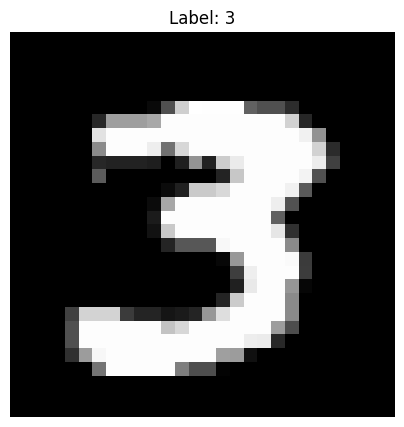

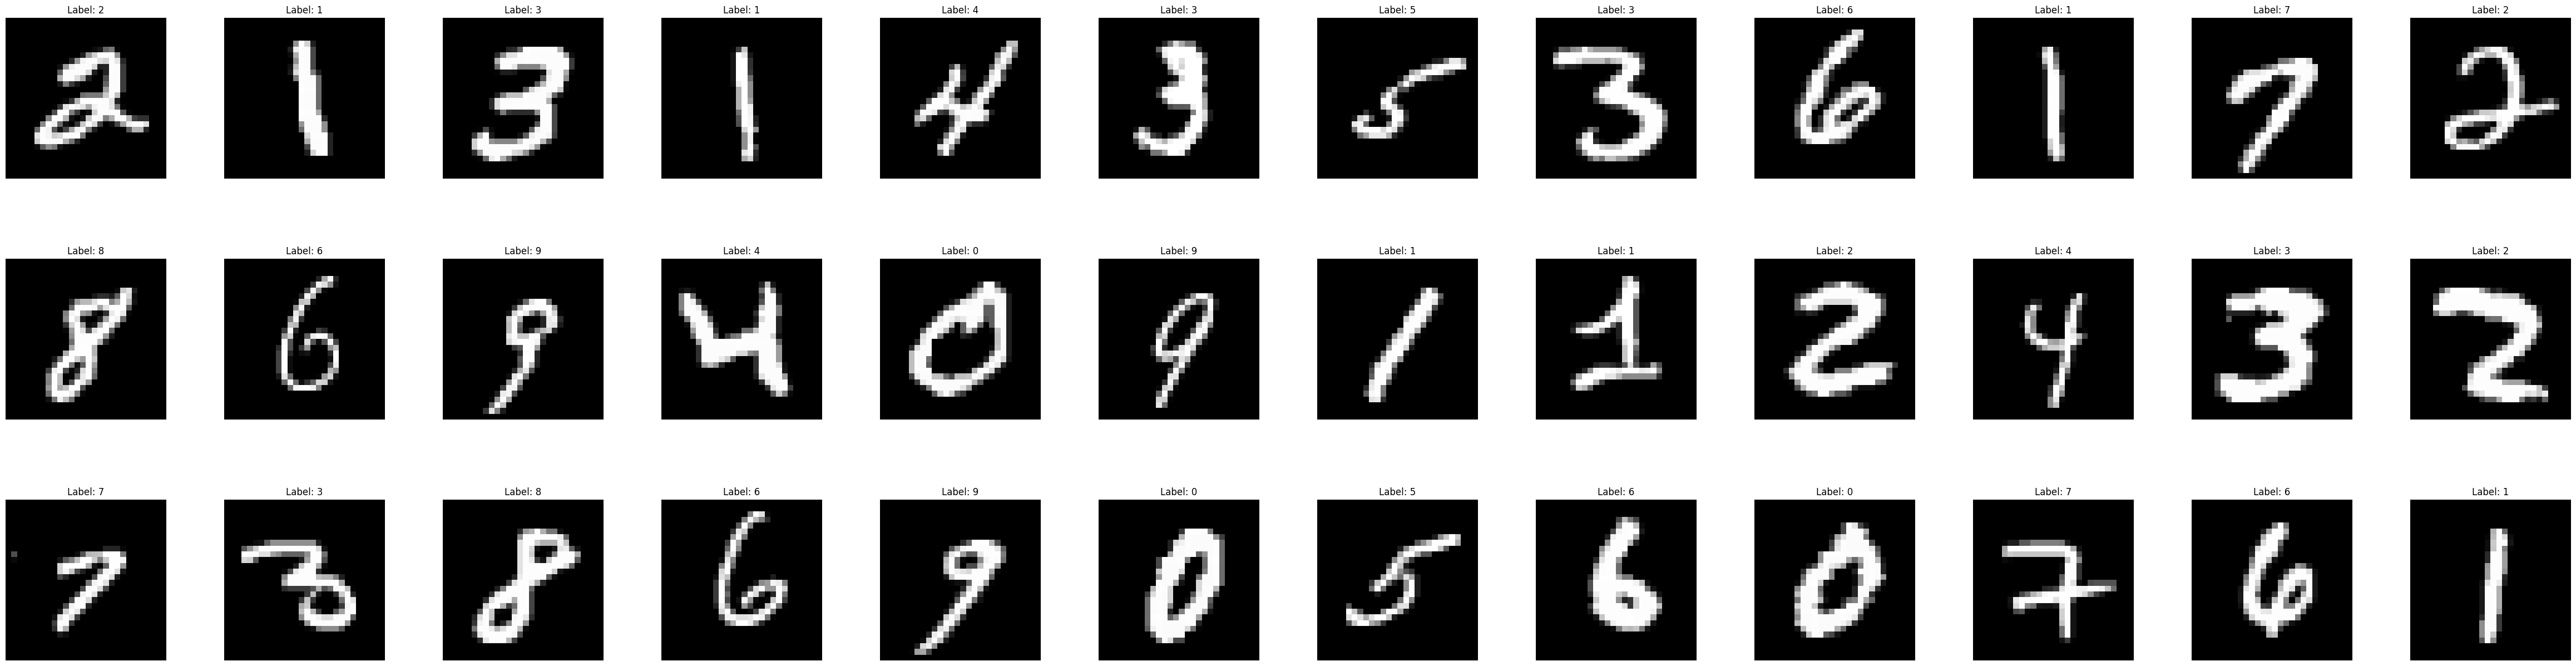

In [ ]:
import matplotlib.pyplot as plt

def plot_images(x_train, y_train, indices, x_size=5, y_size=5, colorbar=False, save_as=None, columns=1):
    """
    Plots images from the MNIST dataset.

    Args:
        x_train: The training data.
        y_train: The training labels.
        indices: A list of indices of the images to plot.
        x_size: The width of the plot.
        y_size: The height of the plot.
        colorbar: Whether to show a colorbar.
        save_as: The filename to save the plot to.
        columns: The number of columns to use in the plot.
    """
    num_images = len(indices)
    rows = (num_images + columns - 1) // columns  # Calculate number of rows

    fig, axes = plt.subplots(rows, columns, figsize=(x_size * columns, y_size * rows))
    fig.subplots_adjust(hspace=0.5)  # Adjust spacing between subplots

    for i, index in enumerate(indices):
        row = i // columns
        col = i % columns

        # Handle single image case
        if num_images == 1:
            ax = axes
        else:
            ax = axes[row, col]

        ax.imshow(x_train[index], cmap='gray')
        ax.set_title(f"Label: {y_train[index]}")
        ax.axis('off')

    if save_as:
        plt.savefig(save_as)

    plt.show()


# Example usage:
plot_images(x_train, y_train, [27], x_size=5, y_size=5, colorbar=True, save_as='01-one-digit')
plot_images(x_train, y_train, range(5, 41), columns=12, save_as='02-many-digit')

**construction du model**

les informations sont

optimiseur
activation
loss
metrics

In [ ]:
hidden1 =100
hidden2 =100
model = keras.models.Sequential()

model.add(keras.layers.Input((28,28,1)))

model.add(keras.layers.Conv2D(8, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Dropout(0.2))

model.add(keras.layers.Conv2D(16, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Dropout(0.2))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(10, activation='softmax'))
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 8)           │              80 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 8)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 13, 13, 8)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 16)          │           1,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 5, 5, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 400)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100)                 │          40,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 42,358 (165.46 KB)

 Trainable params: 42,358 (165.46 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

**entrain le model**

In [ ]:
batch_size =512
epochs =16

history =model.fit(x_train , y_train,
                   batch_size =512,
                   epochs =16,
                   validation_data =(x_test ,y_test)
                   )

Epoch 1/16
118/118 ━━━━━━━━━━━━━━━━━━━━ 20s 150ms/step - accuracy: 0.4489 - loss: 1.6396 - val_accuracy: 0.9305 - val_loss: 0.2662
Epoch 2/16
118/118 ━━━━━━━━━━━━━━━━━━━━ 19s 160ms/step - accuracy: 0.8727 - loss: 0.4152 - val_accuracy: 0.9560 - val_loss: 0.1484
Epoch 3/16
118/118 ━━━━━━━━━━━━━━━━━━━━ 19s 145ms/step - accuracy: 0.9176 - loss: 0.2733 - val_accuracy: 0.9696 - val_loss: 0.1061
Epoch 4/16
118/118 ━━━━━━━━━━━━━━━━━━━━ 22s 156ms/step - accuracy: 0.9337 - loss: 0.2181 - val_accuracy: 0.9736 - val_loss: 0.0891
Epoch 5/16
118/118 ━━━━━━━━━━━━━━━━━━━━ 19s 145ms/step - accuracy: 0.9418 - loss: 0.1895 - val_accuracy: 0.9775 - val_loss: 0.0748
Epoch 6/16
118/118 ━━━━━━━━━━━━━━━━━━━━ 21s 148ms/step - accuracy: 0.9514 - loss: 0.1630 - val_accuracy: 0.9803 - val_loss: 0.0643
Epoch 7/16
118/118 ━━━━━━━━━━━━━━━━━━━━ 20s 145ms/step - accuracy: 0.9538 - loss: 0.1519 - val_accuracy: 0.9809 - val_loss: 0.0600
Epoch 8/16
118/118 ━━━━━━━━━━━━━━━━━━━━ 20s 141ms/step - accuracy: 0.9571 - loss: 0

**Evaluation du model**

**final loss and accurray**

**Dans le DNN on avait une precision  de 97,77%**

In [ ]:
score = model.evaluate(x_test , y_test ,verbose =0)
print(f'Test loss : {score[0]:4.4f}')
print(f'Test accuracy : {score[1]:4.4f}')

Test loss : 0.0387
Test accuracy : 0.9876


**plot history**

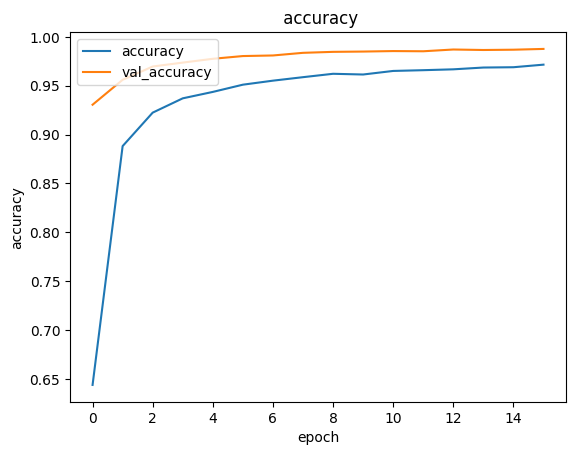

In [ ]:
# plot history
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title(' accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy', 'val_accuracy'], loc='upper left')

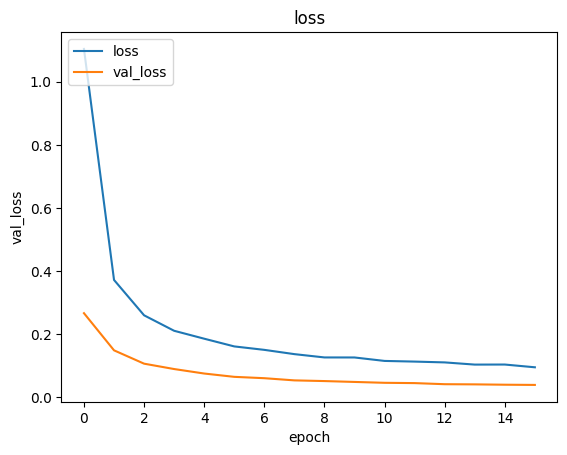

In [ ]:
# plot history
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss')
plt.ylabel('val_loss')
plt.xlabel('epoch')
plt.legend(['loss', 'val_loss'], loc='upper left')

**Plot results**

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


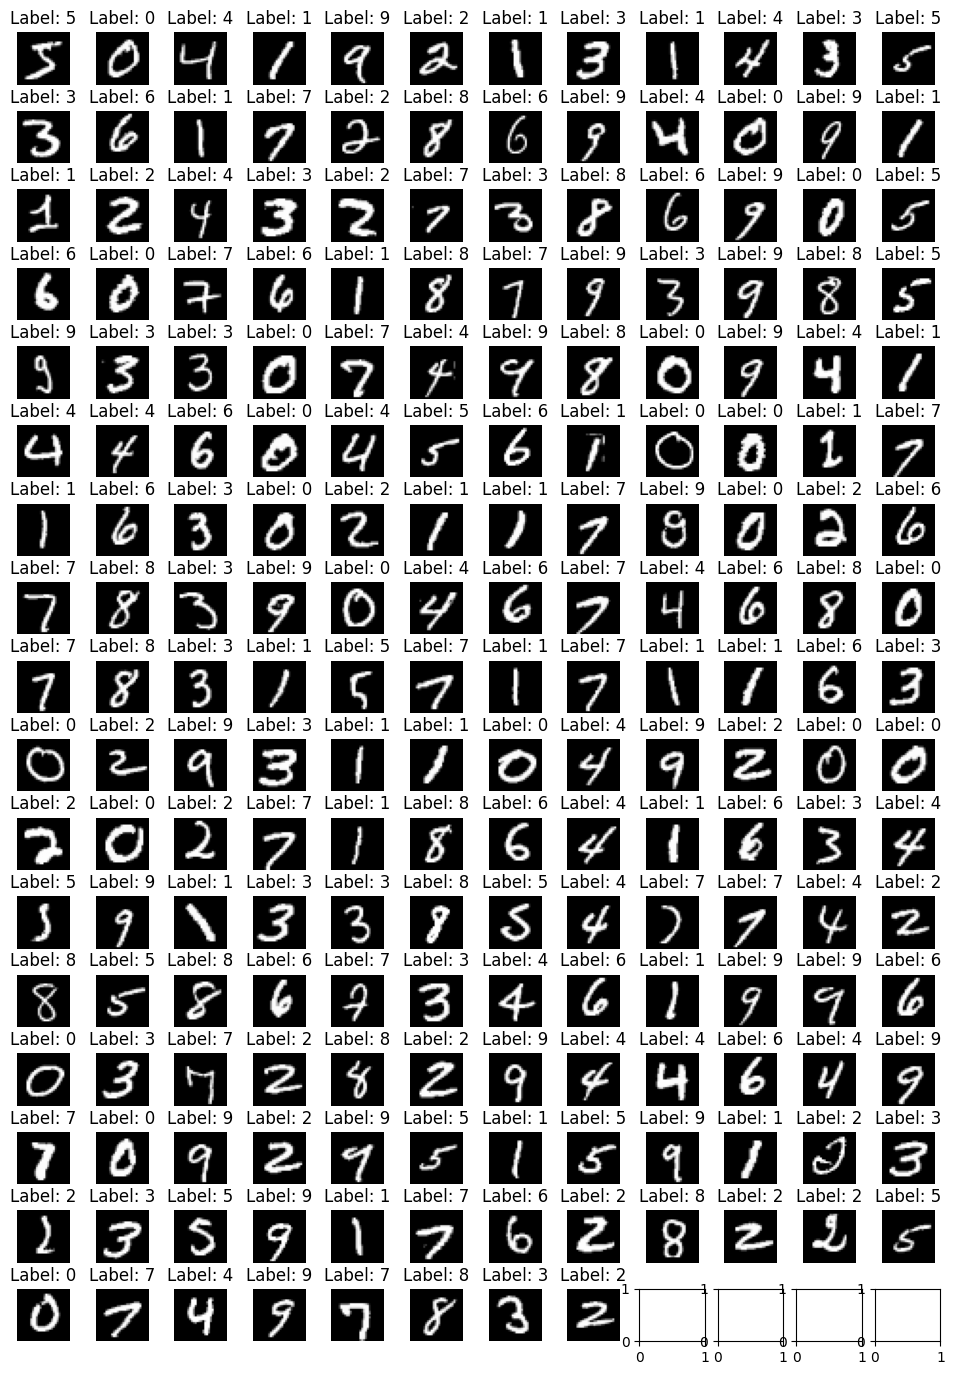

In [ ]:
# plot results
import matplotlib.pyplot as plt
#y_pred = model.predict_class(x_test)

y_sigmoid = model.predict(x_test)
y_pred = np.argmax(y_sigmoid, axis=1)
import matplotlib.pyplot as plt
def plot_images(x_test, y_test, indices, columns=12, x_size=1, y_size=1,y_pred = y_pred  , save_as=None):
    """
    Plots images from the MNIST dataset.

    Args:
        x_train: The training data.
        y_train: The training labels.
        indices: A list of indices of the images to plot.
        x_size: The width of the plot.
        y_size: The height of the plot.
        colorbar: Whether to show a colorbar.
        save_as: The filename to save the plot to.
        columns: The number of columns to use in the plot.
    """
    num_images = len(indices)
    rows = (num_images + columns - 1) // columns  # Calculate number of rows

    fig, axes = plt.subplots(rows, columns, figsize=(x_size * columns, y_size * rows))
    fig.subplots_adjust(hspace=0.5)  # Adjust spacing between subplots

    for i, index in enumerate(indices):
        row = i // columns
        col = i % columns

        # Handle single image case
        if num_images == 1:
            ax = axes
        else:
            ax = axes[row, col]

        ax.imshow(x_train[index], cmap='gray')
        ax.set_title(f"Label: {y_train[index]}")
        ax.axis('off')

    if save_as:
        plt.savefig(save_as)

    plt.show()
plot_images(x_test, y_test, range(0,200),columns = 12, x_size=1, y_size=1, y_pred =y_pred , save_as='04-predictions')

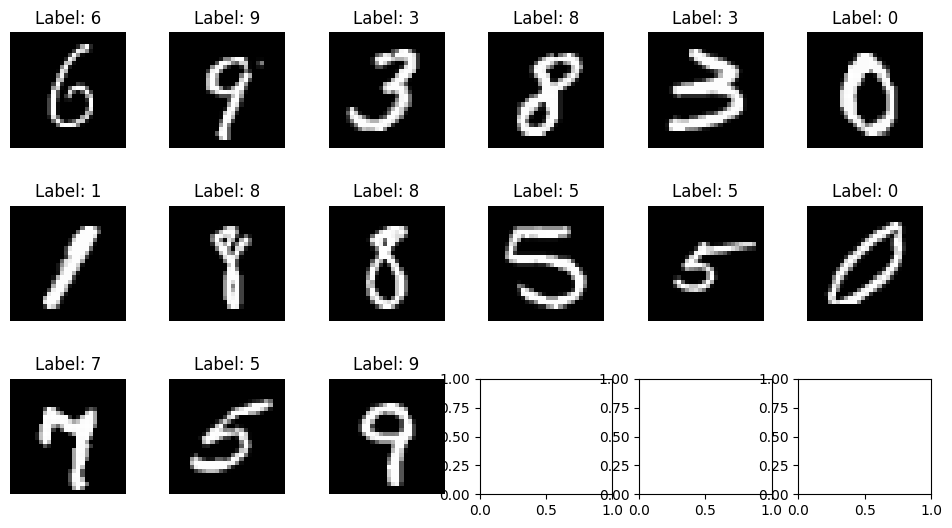

In [ ]:
# plot some errors
errors =[i for i in range(len(x_test)) if y_pred[i]!=y_test[i]]
errors =errors[:min(24,len(errors))]

plot_images(x_test, y_test, errors[:15],columns = 6, x_size=2, y_size=2, y_pred =y_pred , save_as='05-som-errors')





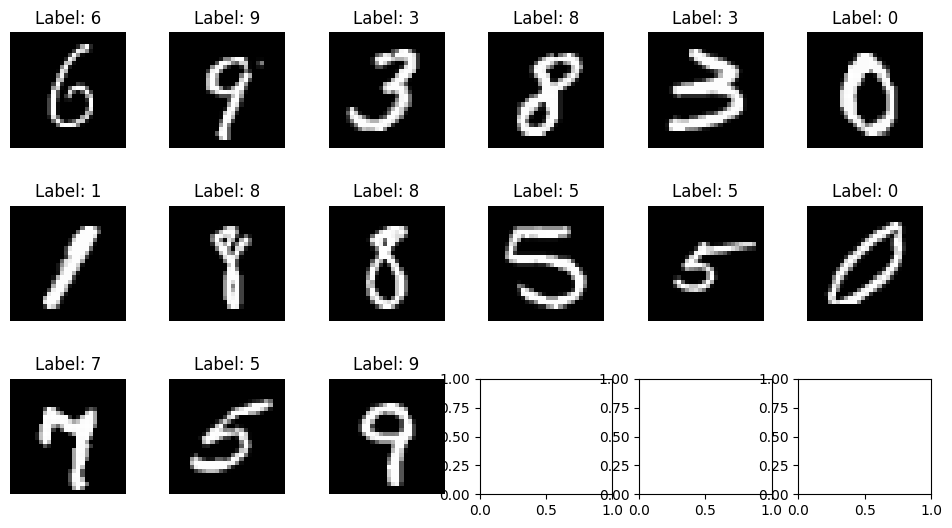

In [ ]:
# plot some errors
errors =[i for i in range(len(x_test)) if y_pred[i]!=y_test[i]]
errors =errors[:min(24,len(errors))]


import matplotlib.pyplot as plt
def plot_images(x_test, y_test, indices, columns=6, x_size=2, y_size=2,y_pred = y_pred  , save_as=None):
    """
    Plots images from the MNIST dataset.

    Args:
        x_train: The training data.
        y_train: The training labels.
        indices: A list of indices of the images to plot.
        x_size: The width of the plot.
        y_size: The height of the plot.
        colorbar: Whether to show a colorbar.
        save_as: The filename to save the plot to.
        columns: The number of columns to use in the plot.
    """
    num_images = len(indices)
    rows = (num_images + columns - 1) // columns  # Calculate number of rows

    fig, axes = plt.subplots(rows, columns, figsize=(x_size * columns, y_size * rows))
    fig.subplots_adjust(hspace=0.5)  # Adjust spacing between subplots

    for i, index in enumerate(indices):
        row = i // columns
        col = i % columns

        # Handle single image case
        if num_images == 1:
            ax = axes
        else:
            ax = axes[row, col]

        ax.imshow(x_train[index], cmap='gray')
        ax.set_title(f"Label: {y_train[index]}")
        ax.axis('off')

    if save_as:
        plt.savefig(save_as)

    plt.show()
plot_images(x_test, y_test, errors[:15],columns = 6, x_size=2, y_size=2, y_pred =y_pred , save_as='05-som-errors')



<Axes: title={'center': 'confusion matrix'}>

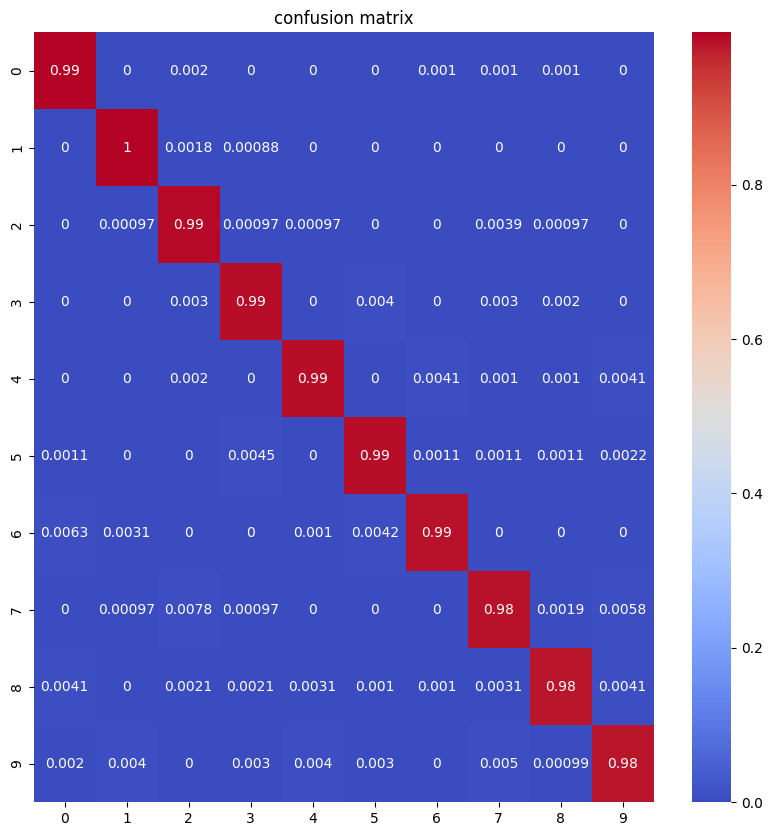

In [ ]:
#matrice de confusion dans une figure avec un plot
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred, labels=range(10), normalize='true')
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
plt.title('confusion matrix')

sns.heatmap(cm, annot=True, cmap='coolwarm')